## Predicción Reservas

## Introducción

<div class="exercise">

- El objetivo es predecir las reservas del hotel.

- Se realizan diferentes predicciones de las reservas.

- Se tienen datos semanales desde 2015 hasta 2017-09-03. 

- Se dejan fuera de la estimación las 4 últimas semanas para seleccionar el mejor modelo.

- Se prueban todos los modelos de suavizados exponencial. 

</div>

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Lectura
#Lectura
df_w_r = pd.read_csv('df_reservas.csv')
df_w_r['ArrivalDate'] = pd.to_datetime(df_w_r['ArrivalDate'])
df_w_r = df_w_r.set_index('ArrivalDate')
df_w_r.tail()

,IsCanceled
ArrivalDate,
2017-08-06,703
2017-08-13,717
2017-08-20,797
2017-08-27,678
2017-09-03,349


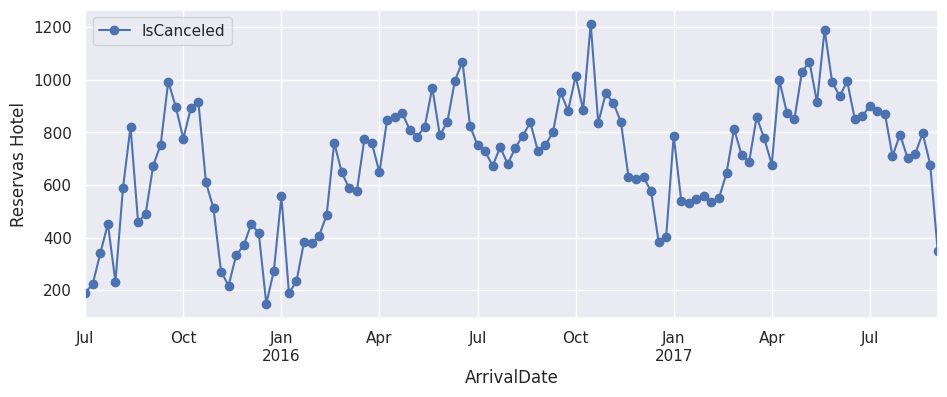

In [4]:
# Graficar Reservas
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
ax = df_w_r.plot(marker='o', linestyle='-')
ax.set_ylabel('Reservas Hotel');

Analisis Estacionalidad
 - Componente estacional, meses con mayores reservas en octubre y descenso de las reservas durante el mes de enero

## Modelo de Suavizado Exponencial

In [5]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

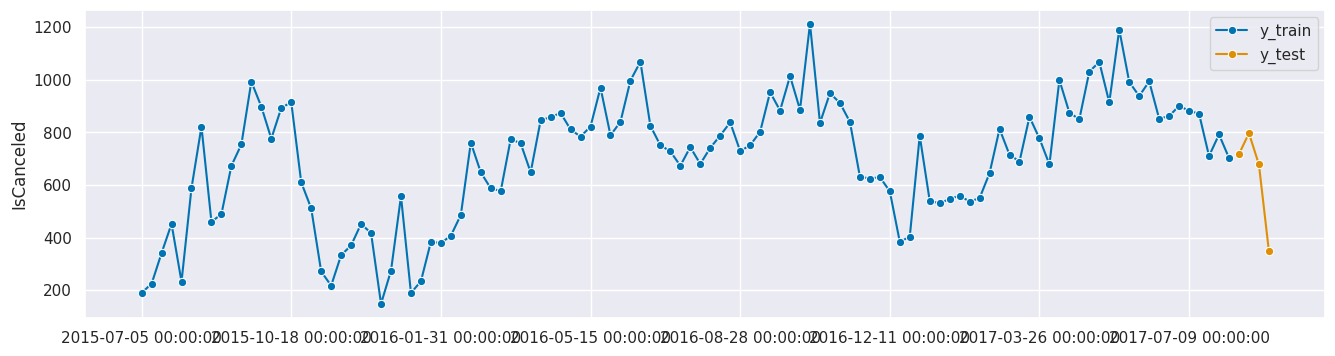

In [6]:
# Separamos la muestra entre train y test, vamos a predecir 4 periodos
y_train, y_test = temporal_train_test_split(y =df_w_r["IsCanceled"], test_size=4)
plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [7]:
from sktime.forecasting.ets import AutoETS

In [8]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 5)

# step 3: specifying the forecasting algorithm (4) son los periodos que es trimestral
df_w_r_model = AutoETS(auto=True, sp=4, n_jobs=-1)

In [9]:
df_w_r_model.fit(y_train) # Se estima con los datos de train SO LO

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.

AutoETS(auto=True, n_jobs=-1, sp=4)

In [10]:
print(df_w_r_model.summary())

                                 ETS Results                                  
Dep. Variable:             IsCanceled   No. Observations:                  110
Model:                       ETS(ANA)   Log Likelihood                -695.621
Date:                Wed, 20 Dec 2023   AIC                           1407.243
Time:                        15:10:33   BIC                           1428.847
Sample:                    07-05-2015   HQIC                          1416.006
                         - 08-06-2017   Scale                        18211.088
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.6432      0.082      7.797      0.000       0.482       0.805
smoothing_seasonal  3.568e-05        nan        nan        nan         nan         nan
initial_level       

In [11]:
# Predicciones
model_predict_r = df_w_r_model.predict(fh)
print(model_predict_r)

2017-08-13    786.896063
2017-08-20    735.727456
2017-08-27    691.162663
2017-09-03    743.391248
Freq: W-SUN, Name: IsCanceled, dtype: float64


In [12]:
model_predict_r_ints = df_w_r_model.predict_interval(fh, coverage=0.95) # Crear intervalo de prediccion
model_predict_r_ints

IsCanceled             
                  0.95             
                 lower        upper
2017-08-13  522.401930  1051.390195
2017-08-20  421.244906  1050.210005
2017-08-27  333.613504  1048.711823
2017-09-03  347.432250  1139.350247

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

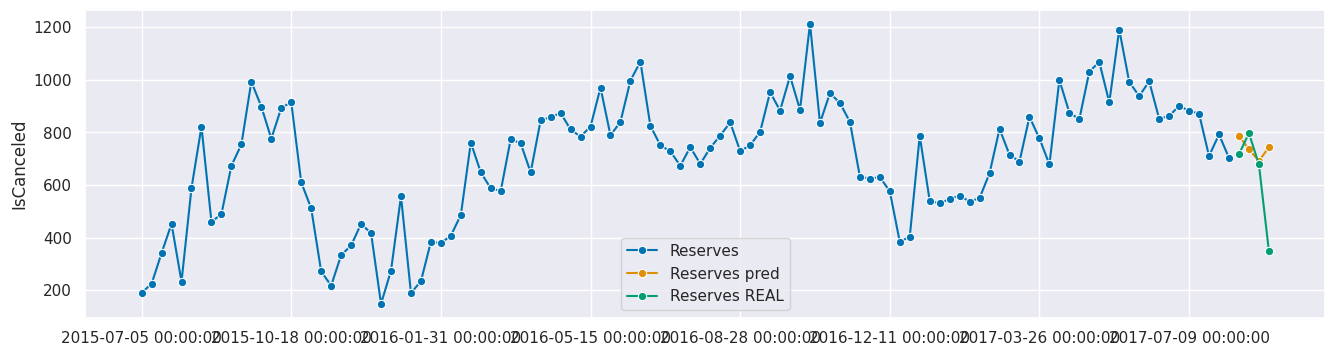

In [13]:
# Representar Predicciones
plot_series(y_train, model_predict_r,y_test, labels=["Reserves", "Reserves pred", "Reserves REAL"])

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

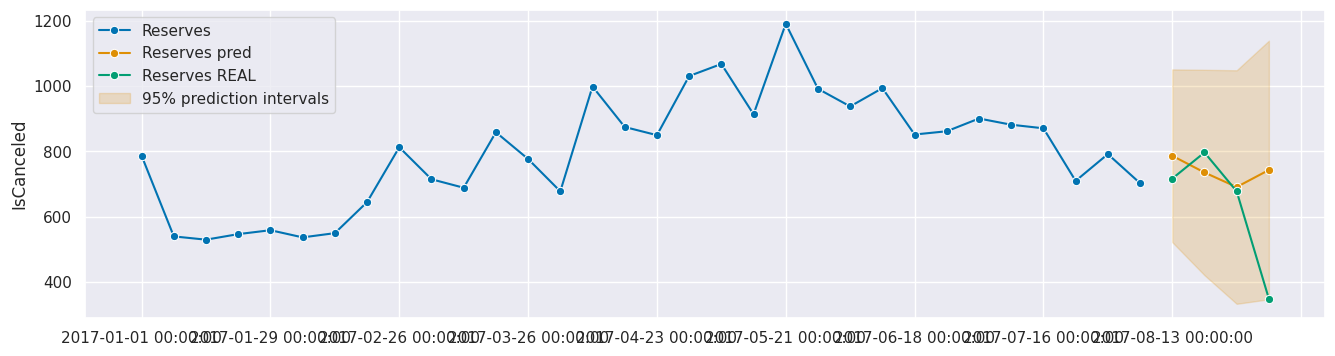

In [14]:
fig, ax = plot_series(y_train["2017":], model_predict_r, y_test, labels=["Reserves", "Reserves pred", "Reserves REAL"])
ax.fill_between(
    ax.get_lines()[-2].get_xdata(),
    model_predict_r_ints[('IsCanceled', 0.95, 'lower')],
    model_predict_r_ints[('IsCanceled', 0.95, 'upper')],
    alpha=0.2,
    color=ax.get_lines()[-2].get_c(),
    label=f"95% prediction intervals",
)
ax.legend(loc='upper left');

Precision de las predicciones

- MAPE

In [15]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
# option 1: using the lean function interface
mean_absolute_percentage_error(y_test, model_predict_r[0:4])  # Para calcular errores

0.33095946662480547

In [16]:
from sktime.performance_metrics.forecasting import MeanSquaredError
mse = MeanSquaredError()
mse(y_test, model_predict_r[0:4])

41089.374195173106

In [17]:
rmse = MeanSquaredError(square_root=True)
rmse(y_test, model_predict_r[0:4]) # Unidades de medida, tiene mas sentido que la primera al no estar elevada al cuadrado

202.70514101811307

Estimamos modelo de forma manual

In [18]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 5)

y = df_w_r['IsCanceled']

df_w_r_model.fit(y)

print(df_w_r_model.summary())

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.

                                 ETS Results                                  
Dep. Variable:             IsCanceled   No. Observations:                  114
Model:                       ETS(ANN)   Log Likelihood                -728.440
Date:                Wed, 20 Dec 2023   AIC                           1462.880
Time:                        15:10:34   BIC                           1471.089
Sample:                    07-05-2015   HQIC                          1466.211
                         - 09-03-2017   Scale                        20780.549
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.6322      0.088      7.153      0.000       0.459       0.805
initial_level     171.6671    135.400      1.268      0.205     -93.713     437.047
Ljung-Box (Q):                  

In [19]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend='additive', seasonal='multiplicative', sp=4)
forecaster.fit(y)

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


ExponentialSmoothing(seasonal='multiplicative', sp=4, trend='additive')

In [20]:
y_pred = forecaster.predict(fh)
y_pred

2017-09-10    484.192657
2017-09-17    450.595844
2017-09-24    419.034710
2017-10-01    395.294740
Freq: W-SUN, Name: IsCanceled, dtype: float64

In [21]:
print(forecaster._fitted_forecaster.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               IsCanceled   No. Observations:                  114
Model:             ExponentialSmoothing   SSE                        2396843.339
Optimized:                         True   AIC                           1150.695
Trend:                         Additive   BIC                           1172.585
Seasonal:                Multiplicative   AICC                          1152.831
Seasonal Periods:                     4   Date:                 Wed, 20 Dec 2023
Box-Cox:                          False   Time:                         15:10:35
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.6508804                alpha                 True
smoothing_trend          

In [22]:
forecaster.get_fitted_params()

{'initial_level': 261.9836677441599,
 'initial_slope': None,
 'initial_seasons': array([1.17008766, 0.9705668 , 1.29124833, 1.28188698]),
 'aic': 1150.694976447599,
 'bic': 1172.584564034755,
 'aicc': 1152.8308987776961}

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

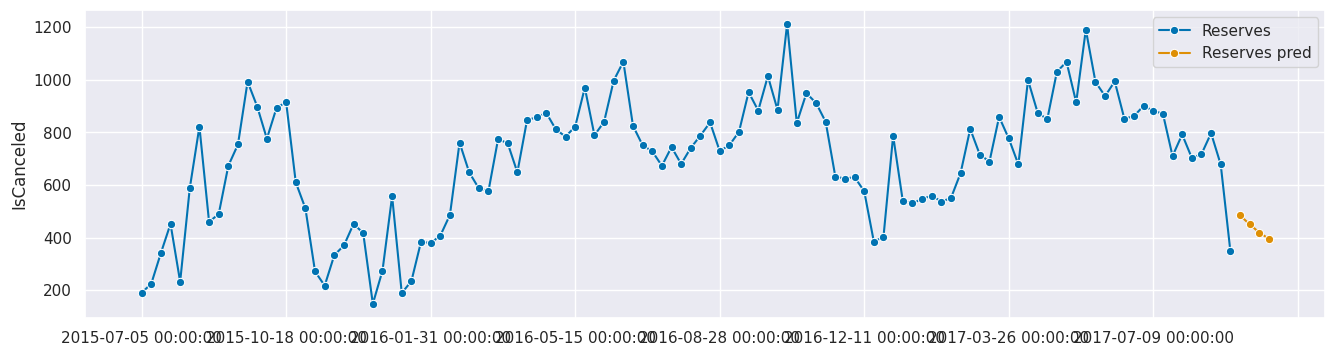

In [23]:
plot_series(y, y_pred, labels=["Reserves", "Reserves pred"])

Estimamos modelo de forma manual sin componente estacional

In [24]:
forecaster = ExponentialSmoothing(trend='additive',seasonal=None, sp=4)
forecaster.fit(y)

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


ExponentialSmoothing(sp=4, trend='additive')

In [25]:
y_pred = forecaster.predict(fh)

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

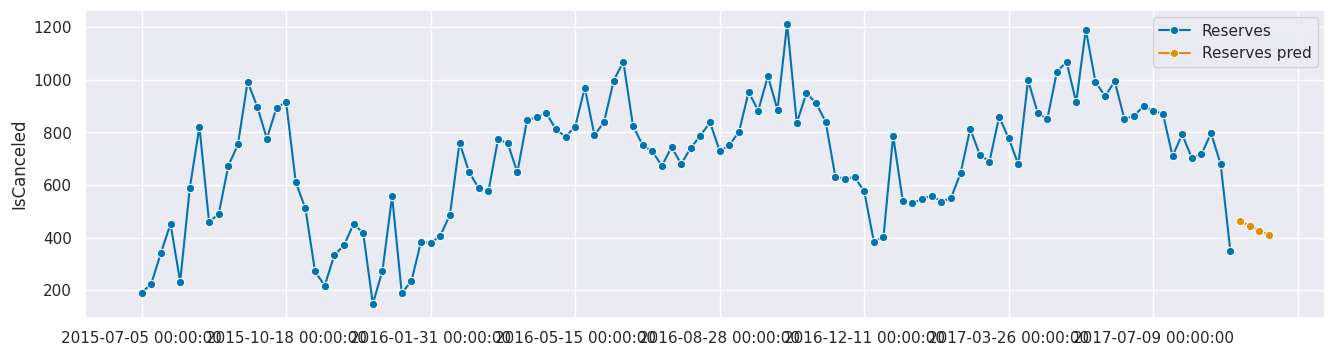

In [26]:
plot_series(y, y_pred, labels=["Reserves", "Reserves pred"])

Estimamos modelo de forma manual sin componente estacional y tendencia multiplicativa

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

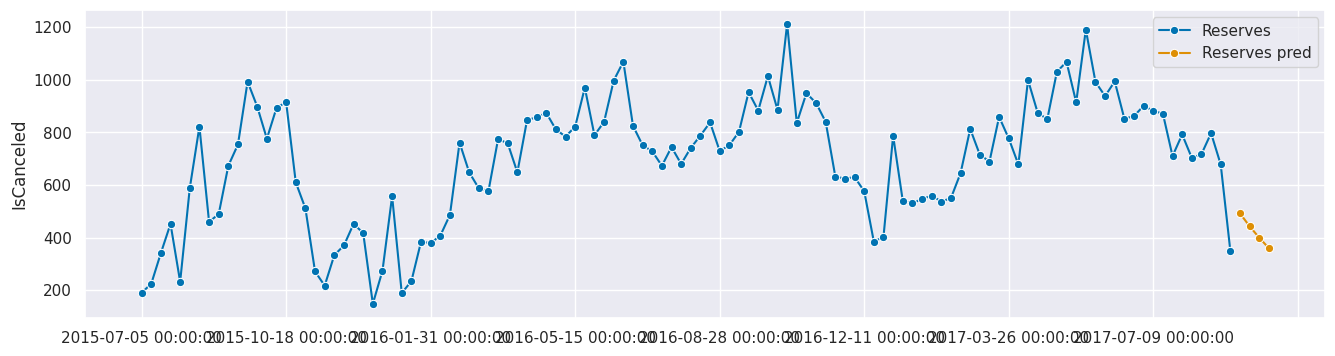

In [27]:
forecaster = ExponentialSmoothing(trend='mul',seasonal=None, sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["Reserves", "Reserves pred"])

Estimamos modelo de forma manual sin componente estacional y sin tendencia multiplicativa

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN b

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

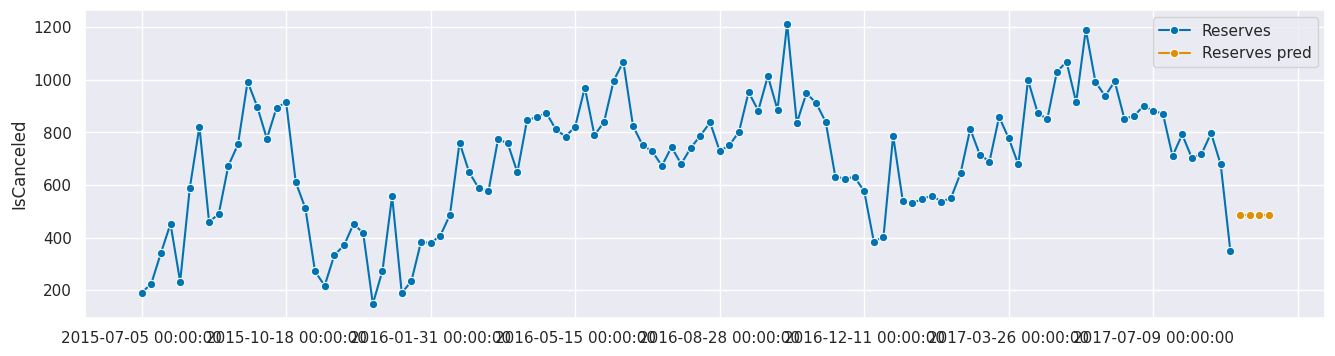

In [28]:
forecaster = ExponentialSmoothing(trend=None,seasonal=None, sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["Reserves", "Reserves pred"])

Estimamos modelo de forma manual sin componente estacional, multiplicative

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN b

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

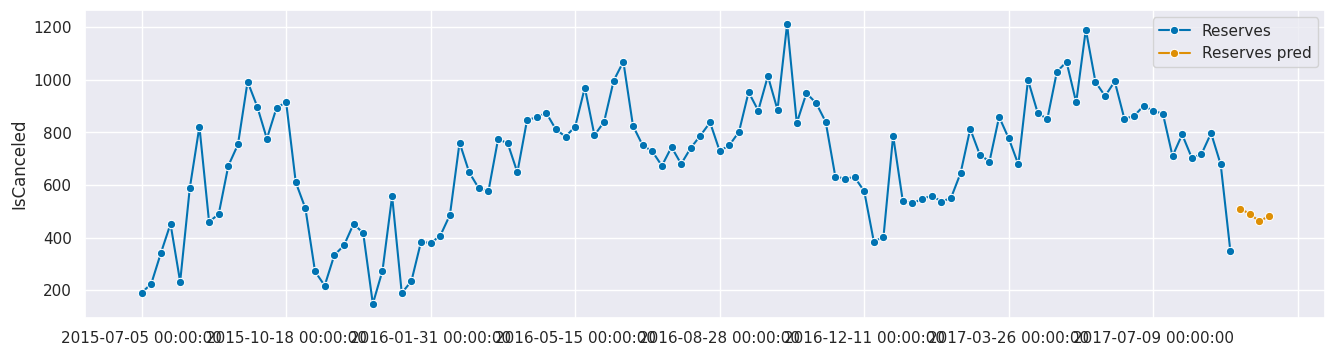

In [29]:
forecaster = ExponentialSmoothing(trend=None,seasonal="mul", sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["Reserves", "Reserves pred"])

Estimemos modelo de forma manual sin tendencia, additive

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN b

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

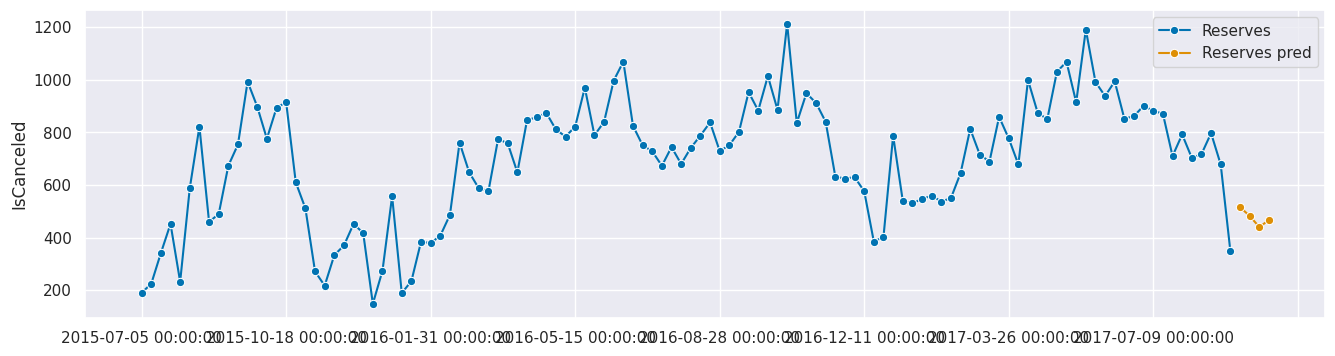

In [30]:
forecaster = ExponentialSmoothing(trend=None,seasonal="add", sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["Reserves", "Reserves pred"])

Compara tendencia con tendencia additive, con y sin damped (Componente estacional aditivo)

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.u

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='IsCanceled'>)

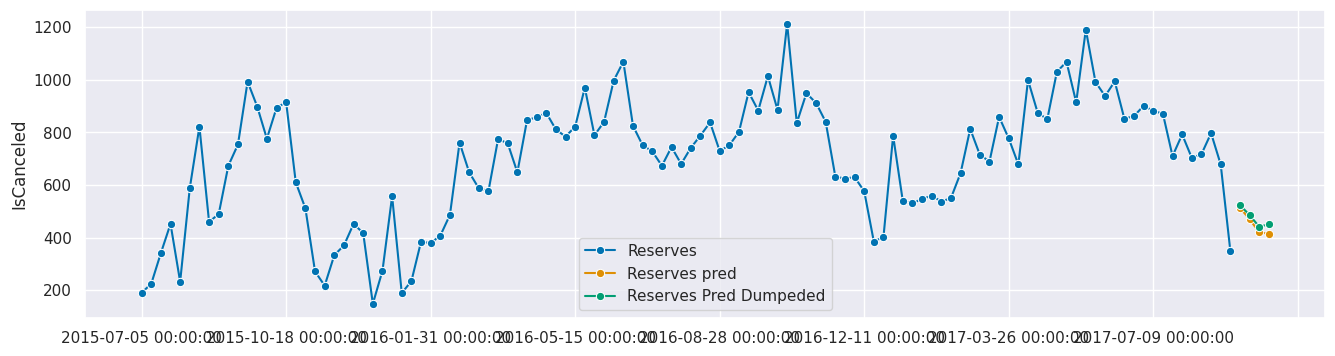

In [31]:
forecaster = ExponentialSmoothing(trend="add",seasonal="add",damped_trend=False, sp=4)
forecaster.fit(y)
y_pred = forecaster.predict(fh)

forecaster = ExponentialSmoothing(trend="add",seasonal="add",damped_trend=True, sp=4)
forecaster.fit(y)
y_pred_dump = forecaster.predict(fh)
plot_series(y["2009":], y_pred, y_pred_dump,labels=["Reserves", "Reserves pred","Reserves Pred Dumpeded"])